# Preprocessing and Exploritory Data Analysis

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re 
import missingno as msno




In [2]:
# Load in the dataframe
df = pd.read_csv('../data/db_computers_2025_raw.csv')

/var/folders/ct/j6s2hnjs0y1101ht51rf6f9w0000gn/T/ipykernel_61647/2794974568.py:2: DtypeWarning: Columns (6,7,8,9,13,14,17,18,19,20,21,22,24,25,26,27,28,29,30,32,36,37,40,41,42,46,49,50,51,53,59,60,62,63,67,70,73,75,76,77,78,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,98,100,103,104,105,126,127,128,129,130,132,133,134,135) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/db_computers_2025_raw.csv')


## Data inpection & summary statistics 

### Initial examination

In [11]:
df.head()


,Unnamed: 0,Título,Precio_Rango,Ofertas,Tipo de producto,Serie,Pantalla_Tamaño de la pantalla,Pantalla_Diagonal de la pantalla,Pantalla_Tecnología de la pantalla,Pantalla_Luminosidad,...,Características especiales,Almacenamiento_Formato audiovisual compatible,Otras características_Modo de sonido,Propiedades de la carcasa_Superficie del material,Disco duro_Capacidad disco duro (GB),"Propiedades de la carcasa_Bahía externa de 3,5""",Procesador_Placa base,Otras características_Certificado RoHS,Sistema operativo_Software incluido,Procesador_Procesadores compatibles
0,0,"Apple MacBook Air 13"" 2024 M3","1.026,53 € – 2.287,17 €",200 ofertas:,Portátil multimedia,Apple MacBook Air,"13,6 pulgadas","34,544 cm",Retina,500 cd/m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"Apple MacBook Air 15"" 2024 M3","1.270,42 € – 2.672,25 €",230 ofertas:,Portátil multimedia,Apple MacBook Air,"15,3 pulgadas","38,862 cm",Retina,500 cd/m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"Apple MacBook Pro 14"" M4 (2024)","1.731,44 € – 4.932,25 €",136 ofertas:,Portátil multimedia,Apple MacBook Pro,"14,2 pulgadas","36,068 cm",Retina,1.000 cd/m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,ASUS TUF Gaming A15 FA506 (2024),"647,00 € – 1.031,71 €",30 ofertas:,Portátil gaming,ASUS TUF Gaming,"15,6 pulgadas","39,624 cm",Full HD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,GigaByte Aero 16 OLED BKF,"1.031,31 € – 2.069,99 €",29 ofertas:,Portátil gaming,Gigabyte Aero,16 pulgadas,"40,64 cm",UHD+,600 cd/m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Based on the head of the dataset, we can see that the dataset has large amount of collumns. This is most likley due to the different types of PC parts that have their own unique properties that do not apply to other categories.

In [12]:
df.tail()

,Unnamed: 0,Título,Precio_Rango,Ofertas,Tipo de producto,Serie,Pantalla_Tamaño de la pantalla,Pantalla_Diagonal de la pantalla,Pantalla_Tecnología de la pantalla,Pantalla_Luminosidad,...,Características especiales,Almacenamiento_Formato audiovisual compatible,Otras características_Modo de sonido,Propiedades de la carcasa_Superficie del material,Disco duro_Capacidad disco duro (GB),"Propiedades de la carcasa_Bahía externa de 3,5""",Procesador_Placa base,Otras características_Certificado RoHS,Sistema operativo_Software incluido,Procesador_Procesadores compatibles
8059,4027,Ankermann Work Home (4260561745772),"249,00 €",1 oferta:,PC de oficina,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,500 GB,NaN,NaN,NaN,NaN,NaN
8060,4028,Captiva Advanced Gaming I75\nI75-363,"1.129,99 €",1 oferta:,PC gaming,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8061,4029,Vibox VIII-49 Gaming PC i9-11900F / RTX 4070 Ti,"2.249,95 €",1 oferta:,PC gaming,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8062,4030,Sedatech UCCG810I2I1HF - Watercooling Gaming-PC,"3.269,90 €",1 oferta:,PC gaming,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8063,4031,Ankermann Gaming PC (4260561745598),"2.543,00 €",1 oferta:,PC gaming,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 8063 items in this dataset that we will have to deal with. An important part to look at is the data types. We have 10 Columns with type Float, 1 column with an integer type, and 125 object columns. These datatypes are important to help us understand what type of database is suitable for this dataset.

### Summary Statistics

In [13]:
df.describe()

,Unnamed: 0,Sonido_Número de altavoces,Otras características_Fecha de lanzamiento,Disco duro_Número de discos duros (instalados),Alimentación_Número de celdas,Procesador_Número de hilos de ejecución,RAM_Número de ranuras para memoria RAM,"Propiedades de la carcasa_Bahía interna de 2,5""","Propiedades de la carcasa_Bahía interna de 3,5""","Propiedades de la carcasa_Bahía externa de 5,25""","Propiedades de la carcasa_Bahía externa de 3,5"""
count,8064.000000,2938.000000,3781.000000,5598.000000,2679.000000,3102.000000,1043.000000,358.000000,138.000000,49.000000,17.000000
mean,2015.500000,2.477195,2022.613065,0.988567,3.530795,16.374275,2.478428,1.304469,1.557971,1.632653,1.176471
std,1164.010282,1.111884,1.511238,0.238087,1.037607,7.292888,1.081277,0.603010,0.704709,0.528121,0.392953
min,0.000000,2.000000,2012.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1007.750000,2.000000,2022.000000,1.000000,3.000000,12.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,2015.500000,2.000000,2023.000000,1.000000,3.000000,16.000000,2.000000,1.000000,1.000000,2.000000,1.000000
75%,3023.250000,2.000000,2024.000000,1.000000,4.000000,20.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,4031.000000,8.000000,2025.000000,3.000000,8.000000,32.000000,8.000000,6.000000,5.000000,3.000000,2.000000


Since not every row has values for all the columns, the .describe function does not help us as much as it could. We may have to split the dataset into multiple datasets to get a better understanding of the data.

In [68]:
df.nunique()


Unnamed: 0                                         4032
Título                                             8053
Precio_Rango                                       6706
Ofertas                                             110
Tipo de producto                                     17
                                                   ... 
Propiedades de la carcasa_Bahía externa de 3,5"       2
Procesador_Placa base                                13
Otras características_Certificado RoHS                1
Sistema operativo_Software incluido                   5
Procesador_Procesadores compatibles                   4
Length: 136, dtype: int64

There seems to be almost zero non-unqiue features. There are 8064 entries and 8053 of them are unique. All have their own values for properties that differeniate eachother. This is helpful to know that there are almost zero duplicate PC products. Let check now for any duplicates.

In [14]:
df.duplicated().sum()

np.int64(0)

Despite the number of entries (8064) and unqiue titles (8053) only slightly differing, there are no exact duplicate rows. So there is no further duplicate data handling needed.

In [15]:
# Check for columns that have no values
df.isnull().sum()

Unnamed: 0                                            0
Título                                                0
Precio_Rango                                        137
Ofertas                                             137
Tipo de producto                                    545
                                                   ... 
Propiedades de la carcasa_Bahía externa de 3,5"    8047
Procesador_Placa base                              8036
Otras características_Certificado RoHS             8057
Sistema operativo_Software incluido                8058
Procesador_Procesadores compatibles                8058
Length: 136, dtype: int64

Here we can see that there are no empty columns. We have a total of 8064 rows, and none of the columns have 8064 null values.

## Renaming Columns

Since the names of the columns are extremely inconsistent and repetative, lets perform some operations to make sure they are simple, consistent, and follow python best practices.

In [4]:
import re
from unidecode import unidecode

# common small words to drop after chopping off the repeated category
STOP_WORDS = {'de', 'del', 'la', 'el', 'los', 'las', 'y', 'a', 'en', 'para', 'por', 'con'}

def slugify(text: str) -> str:
    text = unidecode(text.strip())
    text = re.sub(r'[^0-9A-Za-z]+', '_', text)   # non-alnum → _
    text = re.sub(r'_+', '_', text)               # collapse __ → _
    return text.strip('_').lower()

def clean_col(col: str) -> str:
    col = col.strip()
    if "_" not in col:
        return slugify(col)
    cat_raw, attr_raw = col.split("_", 1)
    cat = slugify(cat_raw)
    attr = slugify(attr_raw)

    tokens = attr.split("_")
    if cat in tokens:
        # keep everything before the first appearance of the category
        idx = tokens.index(cat)
        tokens = tokens[:idx]
        # drop little filler words
        tokens = [t for t in tokens if t not in STOP_WORDS]
        attr = "_".join(tokens)

    return f"{cat}_{attr}" if attr else cat

# Apply toDataFrame:
df.columns = [clean_col(c) for c in df.columns]

df.head()

,unnamed_0,titulo,precio_rango,ofertas,tipo_de_producto,serie,pantalla_tamano,pantalla_diagonal,pantalla_tecnologia,pantalla_luminosidad,...,caracteristicas_especiales,almacenamiento_formato_audiovisual_compatible,otras_caracteristicas_modo_de_sonido,propiedades_de_la_carcasa_superficie_del_material,disco_duro_capacidad_disco_duro_gb,propiedades_de_la_carcasa_bahia_externa_de_3_5,procesador_placa_base,otras_caracteristicas_certificado_rohs,sistema_operativo_software_incluido,procesador_procesadores_compatibles
0,0,"Apple MacBook Air 13"" 2024 M3","1.026,53 € – 2.287,17 €",200 ofertas:,Portátil multimedia,Apple MacBook Air,"13,6 pulgadas","34,544 cm",Retina,500 cd/m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"Apple MacBook Air 15"" 2024 M3","1.270,42 € – 2.672,25 €",230 ofertas:,Portátil multimedia,Apple MacBook Air,"15,3 pulgadas","38,862 cm",Retina,500 cd/m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"Apple MacBook Pro 14"" M4 (2024)","1.731,44 € – 4.932,25 €",136 ofertas:,Portátil multimedia,Apple MacBook Pro,"14,2 pulgadas","36,068 cm",Retina,1.000 cd/m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,ASUS TUF Gaming A15 FA506 (2024),"647,00 € – 1.031,71 €",30 ofertas:,Portátil gaming,ASUS TUF Gaming,"15,6 pulgadas","39,624 cm",Full HD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,GigaByte Aero 16 OLED BKF,"1.031,31 € – 2.069,99 €",29 ofertas:,Portátil gaming,Gigabyte Aero,16 pulgadas,"40,64 cm",UHD+,600 cd/m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### "Unamed" Column

The "Unamed" Column simply represents the index of the item in the csv file. Since there are no relationships between the PC parts based on the index or a UUID, we can drop this column.

In [5]:
# Drop the "Unamed" column
df.drop(columns=['unnamed_0'], inplace=True)


In [6]:
print(df.columns)


Index(['titulo', 'precio_rango', 'ofertas', 'tipo_de_producto', 'serie',
       'pantalla_tamano', 'pantalla_diagonal', 'pantalla_tecnologia',
       'pantalla_luminosidad', 'procesador',
       ...
       'caracteristicas_especiales',
       'almacenamiento_formato_audiovisual_compatible',
       'otras_caracteristicas_modo_de_sonido',
       'propiedades_de_la_carcasa_superficie_del_material',
       'disco_duro_capacidad_disco_duro_gb',
       'propiedades_de_la_carcasa_bahia_externa_de_3_5',
       'procesador_placa_base', 'otras_caracteristicas_certificado_rohs',
       'sistema_operativo_software_incluido',
       'procesador_procesadores_compatibles'],
      dtype='object', length=135)


## Feature Cleaning

For the purpose of the Feature Cleaning section, 

There are quite a few columns in this dataset that need some cleaning up. For example, the "Precio_Rango" is a string something like the following: "1.026,53 € – 2.287,17 €". This is not helpful for data processing. We need to turn this data into a framework that we can work with. In this section, we will go through every column and make sure the datatypes and values correctly match as intended.

#### "Precio_Rango"

The price column takes on two different forms: 

- **A range:** "1.026,53 € – 2.287,17 €"
- **A single number:** "479,00 €"

Despite the price of a product being a value, the column is a string, which is not helpful when querying for ranges and processing a value that is supposed to be a number.

Because of these factors, we are going to split this single string column into three different float columns:
- Precio_Max
- Precio_Min
- Precio_Mean

In [7]:
import numpy as np
import pandas as pd

def process_price_range(price_str):
    """
    Processes a price string (either a single price or a range)
    and returns min, max, and mean prices as floats.
    
    Handles formats like "1.026,53 € – 2.287,17 €" or "479,00 €".
    """
    if pd.isna(price_str):
        return np.nan, np.nan, np.nan

    # Standardize cleaning: remove currency, spaces, then fix separators
    cleaned_str = str(price_str).replace('€', '').strip()
    cleaned_str = cleaned_str.replace('.', '') # Remove thousands separator
    cleaned_str = cleaned_str.replace(',', '.') # Replace decimal separator

    min_price_str, max_price_str = None, None

    if '–' in cleaned_str: # It's a range
        parts = cleaned_str.split('–')
        min_price_str = parts[0].strip()
        max_price_str = parts[1].strip()
    else: # It's a single price
        min_price_str = cleaned_str
        max_price_str = cleaned_str
        
    try:
        min_price = float(min_price_str)
        max_price = float(max_price_str)
        mean_price = round((min_price + max_price) / 2, 2)  # Truncate to 2 decimal places
        return min_price, max_price, mean_price
    except (ValueError, TypeError):
        # In case of any conversion error after splitting/cleaning
        return np.nan, np.nan, np.nan

# replace the original column with the new columns
df['precio_min'], df['precio_max'], df['precio_mean'] = zip(*df['precio_rango'].apply(process_price_range))
df.drop(columns=['precio_rango'], inplace=True)

### Extracting Numerical Values from String

While looking through each column, we recognized that to clean the data, we just needed to:

- extract numerical data from string values for processing
- standardize resolution formats

Therefore, we created a few generic functions that could be used to fix up any columns that needed it. Below are those functions: 

In [8]:
def extract_numerical_value_from_string(value_str):
    """
    Extracts the first numerical value (integer or float) from a string.
    Handles NaNs, replaces commas with periods for decimal conversion.
    
    Args:
        value_str: The string to process.
        
    Returns:
        A float representing the extracted number, or np.nan if no number is found
        or if the input is NaN.
    """
    if pd.isna(value_str):
        return np.nan

    s = str(value_str)
    
    # Replace comma with period for decimal conversion
    s = s.replace(',', '.')
    
    # Regex to find the first number (integer or float).
    # This pattern matches:
    #   \d+\.?\d*  -> one or more digits, optionally followed by a decimal point and zero or more digits
    #   |          -> OR
    #   \.\d+      -> a decimal point followed by one or more digits (e.g., ".5")
    match = re.search(r'(\d+\.?\d*|\.\d+)', s)
    
    if match:
        try:
            return float(match.group(1))
        except ValueError:
            # This should be rare if the regex is correct
            return np.nan
    else:
        # If no number is found
        return np.nan


In [9]:
def extract_integer_from_string_with_dot_thousands(value_str):
    """
    Extracts an integer from a string like "5.600 MHz" or "32.000".
    Removes dots (thousands separators) and any trailing non-digits.
    Returns the number as a float (to accommodate NaNs), or np.nan if not parsable.
    """
    if pd.isna(value_str):
        return np.nan

    s = str(value_str)
    
    # Remove dots (thousands separators)
    s_no_dots = s.replace('.', '')
    
    # Regex to find the first sequence of digits in the string (after removing dots)
    # This will extract "5600" from "5600 MHz"
    match = re.search(r'(\d+)', s_no_dots)
    
    if match:
        try:
            return float(match.group(1)) # Using float for consistency with NaNs
        except ValueError:
            return np.nan
    else:
        # If no digits are found
        return np.nan

### Parsing resolution to width x height format

Here is the rest of the generic functions that deal with parsing the resolution to a widthxheight format for features dealing with pixel quality

In [10]:
def parse_resolution_to_wxh_format_modified(resolution_str):
    """
    Parses a resolution string and standardizes it to "WIDTHxHEIGHT" format.
    Extracts the first numerical WxH pattern found.
    Handles thousands separators like '.' (e.g., "3.024 x 1.964").
    Example: "hasta 1920x1080 @ 60Hz" -> "1920x1080"
    Example: "4K (3.840 x 2.160)" -> "3840x2160"
    Example: "3.024 x 1.964 pixles" -> "3024x1964"
    Returns the standardized string, or np.nan if not parsable or input is NaN.
    """
    if pd.isna(resolution_str):
        return np.nan

    s = str(resolution_str)
    
    # Remove dots used as thousands separators before regex matching
    # This allows "3.024" to become "3024" for matching purposes
    s_cleaned_for_regex = s.replace('.', '')
    
    # Regex to find patterns like "1920x1080" or "3840 x 2160"
    # Looks for two numbers (3+ digits each) separated by 'x' (case-insensitive),
    # with optional spaces. Applied on the cleaned string.
    match = re.search(r'(\d{3,})\s*[xX]\s*(\d{3,})', s_cleaned_for_regex)
    
    if match:
        try:
            # The matched groups will already be dot-free due to s_cleaned_for_regex
            width = int(match.group(1))
            height = int(match.group(2))
            return f"{width}x{height}"
        except ValueError:
            # This case should be rare if the regex matches digits
            return np.nan
    else:
        return np.nan


In [11]:
def standardize_resolution_column(df, input_col_name, output_col_name, drop_input_col=False):
    """
    Applies WxH resolution standardization to a DataFrame column.

    Args:
        df (pd.DataFrame): The DataFrame to modify.
        input_col_name (str): The name of the column containing resolution strings to process.
        output_col_name (str): The name of the column to store the standardized resolutions.
                               If same as input_col_name, the input column will be overwritten.
        drop_input_col (bool): If True and output_col_name is different from input_col_name,
                               the original input_col_name will be dropped.
                               This parameter is ignored if input_col_name and output_col_name are the same.
    Returns:
        pd.DataFrame: The DataFrame with the processed column.
    """
    if input_col_name not in df.columns:
        print(f"Error: Input column '{input_col_name}' not found in DataFrame. Skipping.")
        return df

    # Apply the parsing function
    df[output_col_name] = df[input_col_name].apply(parse_resolution_to_wxh_format_modified)

    print(f"Standardized column '{input_col_name}' into '{output_col_name}'.")
    print("\nSample of input and output columns (where input was not NaN):")
    
    sample_df = df[df[input_col_name].notna()][[input_col_name, output_col_name]].drop_duplicates().head(10)
    if not sample_df.empty:
        print(sample_df)
    else:
        print(f"No processable non-NaN data found in '{input_col_name}' or no transformations occurred.")

    print(f"\nValue counts for '{output_col_name}':")
    print(df[output_col_name].value_counts(dropna=False).head(10))
    
    print(f"\nData type of '{output_col_name}': {df[output_col_name].dtype}")

    if drop_input_col and input_col_name != output_col_name:
        if input_col_name in df.columns: # Ensure it still exists (it should)
            df.drop(columns=[input_col_name], inplace=True)
            print(f"\nOriginal column '{input_col_name}' dropped.")
        else:
            # This case should ideally not be reached if input_col_name was present initially
            print(f"\nWarning: Original column '{input_col_name}' was not found for dropping, though it should exist.")
            
    elif drop_input_col and input_col_name == output_col_name:
        print(f"\nInput column '{input_col_name}' was overwritten. Drop parameter ignored.")
        
    print("-" * 50)
    return df


### Apply generic functions to clean up columns

Below are all the columns that required a bit of clean up, and where we applied our generic functions.

#### "Ofertas"

We want to clean the 'Ofertas' column in the dataset because it currently contains strings such as: 
- "200 ofertas:"
- "30 ofertas," 
- "1 oferta:" 

The goal is to extract only the numeric part, for example, 200 or 30, by removing any accompanying words or extra characters. Once cleaned, the values will be converted into float type to make them ready for numerical operations. This cleaning is necessary because the word "ofertas" is unnecessary for data analysis, and having clean numeric data allows us to easily perform tasks such as aggregating totals, calculating averages, visualizing the data, and comparing the number of offers between different products.

In [30]:
df['ofertas'] = df['ofertas'].apply(extract_numerical_value_from_string)

#### "Pantalla_Tamaño de la pantalla"

For the 'Pantalla_Tamaño de la pantalla' column, we firstly want to clean the column name to be just "pantalla_tamano_pulgadas". Then, we aim to clean the data to make it more appropriate for numerical analysis. The column currently contains entries like:
- "13,6 pulgadas"
- "15,3 pulgadas," 

Which combine the screen size with its unit of measurement. The task is to isolate the numeric part of the string, such as 13.6 or 15.3, and remove any associated text or symbols. After cleaning, the values will be converted into floats.

In [12]:
original_col_name = 'pantalla_tamano'
new_col_name = 'pantalla_tamano_pulgadas'

if original_col_name in df.columns:
    df.rename(columns={original_col_name: new_col_name}, inplace=True)
    print(f"Column '{original_col_name}' renamed to '{new_col_name}'")

# 2. Clean the data in the newly renamed column
if new_col_name in df.columns: # Check if renaming was successful (or if it already existed)
    df[new_col_name] = df[new_col_name].apply(extract_numerical_value_from_string)
    print(f"Cleaned data in '{new_col_name}' column.")
else:
    print(f"Column '{new_col_name}' not found after attempting rename.")

Column 'pantalla_tamano' renamed to 'pantalla_tamano_pulgadas'
Cleaned data in 'pantalla_tamano_pulgadas' column.


#### "Pantalla_Diagonal de la pantalla"

Firstly, we want to rename the "pantalla_diagonal" to simply "pantalla_diagonal_cm".

Secondly, the cleaning process involves extracting only the numeric values from strings that currently include both the size and the unit of measurement, such as "34,544 cm" or "40,64 cm." The objective is to remove the text and retain only the numeric component, such as 34.544 or 40.64, which will then be converted into floats.

In [13]:
original_col_name_diag = "pantalla_diagonal"
new_col_name_diag = "pantalla_diagonal_cm"

if original_col_name_diag in df.columns:
    df.rename(columns={original_col_name_diag: new_col_name_diag}, inplace=True)
    print(f"Column '{original_col_name_diag}' renamed to '{new_col_name_diag}'")

    # 2. Clean the data in the newly renamed column
    if new_col_name_diag in df.columns: # Check if renaming was successful
        df[new_col_name_diag] = df[new_col_name_diag].apply(extract_numerical_value_from_string)
        print(f"Cleaned data in '{new_col_name_diag}' column.")
    else:
        print(f"Column '{new_col_name_diag}' not found after attempting rename.")
elif new_col_name_diag in df.columns: # If it was already named 'Pantalla_Diagonal'
    df[new_col_name_diag] = df[new_col_name_diag].apply(extract_numerical_value_from_string)
    print(f"Cleaned data in existing '{new_col_name_diag}' column.")
else:
    print(f"Original column '{original_col_name_diag}' not found. No action taken.")

Column 'pantalla_diagonal' renamed to 'pantalla_diagonal_cm'
Cleaned data in 'pantalla_diagonal_cm' column.


#### "Pantalla_Luminosidad"

We will clean the 'Pantalla_Luminosidad' column by removing the unit of measurement and any formatting symbols, such as "cd/m²" and thousand separators, to keep only the numeric brightness values as floats. This will allow us to perform accurate numerical operations like averaging, comparing, or visualizing brightness levels across devices. 

Secondly, after cleaning the data, we will rename the column to 'pantalla_luminosidad_cd_m2' to make the unit of measurement explicitly part of the column name. This ensures that, even though the values are now purely numeric, it remains clear that they represent brightness in candela per square meter, improving both clarity and documentation of the dataset.

In [14]:
original_luminosidad_col = 'pantalla_luminosidad'
new_luminosidad_col = 'pantalla_luminosidad_cd_m2'

if original_luminosidad_col in df.columns:
    # 1. Clean the data in the original column
    df[original_luminosidad_col] = df[original_luminosidad_col].apply(extract_numerical_value_from_string)
    print(f"Cleaned data in '{original_luminosidad_col}'.")
    
    # 2. Rename the column
    df.rename(columns={original_luminosidad_col: new_luminosidad_col}, inplace=True)
    print(f"Column '{original_luminosidad_col}' renamed to '{new_luminosidad_col}'.")
else:
    print(f"Column '{original_luminosidad_col}' not found.")

Cleaned data in 'pantalla_luminosidad'.
Column 'pantalla_luminosidad' renamed to 'pantalla_luminosidad_cd_m2'.


#### "Grafica_Resolucion externa"

In the 'Gráfica_Resolución externa' column, we would standardize the format of the resolution values by making sure the resolution looks like: 1920x1080. This would make the data cleaner and more usable for numerical analysis and comparison of display resolutions. Removing any unnecessary characters like parentheses would also make the values more consistent.

In [15]:
df = standardize_resolution_column(df, 
                                   input_col_name='grafica_resolucion_externa', 
                                   output_col_name='grafica_resolucion_externa_std', 
                                   drop_input_col=True)

Standardized column 'grafica_resolucion_externa' into 'grafica_resolucion_externa_std'.

Sample of input and output columns (where input was not NaN):
     grafica_resolucion_externa grafica_resolucion_externa_std
0              6K (6016 x 3384)                      6016x3384
2              8K (8192 x 4608)                      8192x4608
3              4K (4096 x 2304)                      4096x2304
965            5K (5120 x 2880)                      5120x2880
1823        WQXGA (2560 x 1600)                      2560x1600
3528          UHD (3840 x 2160)                      3840x2160

Value counts for 'grafica_resolucion_externa_std':
grafica_resolucion_externa_std
NaN          7656
6016x3384     169
8192x4608     162
4096x2304      65
5120x2880       6
2560x1600       5
3840x2160       1
Name: count, dtype: int64

Data type of 'grafica_resolucion_externa_std': object

Original column 'grafica_resolucion_externa' dropped.
--------------------------------------------------


#### "Cámara_Resolución de la cámara"

In [16]:
# Check the unique values in the column
df['camara_resolucion'].unique()

array(['1920 x 1080\xa0píxeles', nan, '720 x 480\xa0píxeles',
       '1280 x 720\xa0píxeles', '640 x 480\xa0píxeles',
       '2560 x 1440\xa0píxeles', '2592 x 1944\xa0píxeles',
       '480 x 640\xa0píxeles'], dtype=object)

In [17]:
df = standardize_resolution_column(df, 
                                   input_col_name='camara_resolucion', 
                                   output_col_name='camara_resolucion_pulgadas', # Overwrites
                                   drop_input_col=False) # drop_input_col is ignored if names are same

Standardized column 'camara_resolucion' into 'camara_resolucion_pulgadas'.

Sample of input and output columns (where input was not NaN):
        camara_resolucion camara_resolucion_pulgadas
0     1920 x 1080 píxeles                  1920x1080
11      720 x 480 píxeles                    720x480
15     1280 x 720 píxeles                   1280x720
150     640 x 480 píxeles                    640x480
652   2560 x 1440 píxeles                  2560x1440
1819  2592 x 1944 píxeles                  2592x1944
2413    480 x 640 píxeles                    480x640

Value counts for 'camara_resolucion_pulgadas':
camara_resolucion_pulgadas
NaN          5270
1280x720     1453
1920x1080    1296
720x480        16
640x480        10
2560x1440      10
2592x1944       7
480x640         2
Name: count, dtype: int64

Data type of 'camara_resolucion_pulgadas': object
--------------------------------------------------


#### "Teclado_Número de teclas"

In [18]:
original_col = 'teclado_numero_de_teclas' 
new_col = 'teclado_numero_de_teclas'
if original_col in df.columns:
    df[new_col] = df[original_col].apply(extract_numerical_value_from_string)
    print(f"Processed '{original_col}' into '{new_col}'. Sample:")
    print(df[[original_col, new_col]].dropna(subset=[original_col]).drop_duplicates().head())
else:
    print(f"Column {original_col} not found.")


Processed 'teclado_numero_de_teclas' into 'teclado_numero_de_teclas'. Sample:
     teclado_numero_de_teclas  teclado_numero_de_teclas
0                        79.0                      79.0
20                       98.0                      98.0
278                      80.0                      80.0
686                      84.0                      84.0
873                      66.0                      66.0


#### "Alimentación_Autonomía de la batería"

In [19]:
df['alimentacion_autonomia_de_la_bateria'].unique()

array(['15\xa0h', '13\xa0h', nan, '8,4\xa0h', '5,3\xa0h', '5,5\xa0h',
       '23\xa0h', '8\xa0h', '7,5\xa0h', '14\xa0h', '7,25\xa0h',
       '4,5\xa0h', '10\xa0h', '27\xa0h', '7,6\xa0h', '6,75\xa0h',
       '10,25\xa0h', '12\xa0h', '9,7\xa0h', '7\xa0h', '16\xa0h',
       '20\xa0h', '6,25\xa0h', '17\xa0h', '12,5\xa0h', '8,25\xa0h',
       '9\xa0h', '29\xa0h', '18\xa0h', '13,4\xa0h', '29,5\xa0h', '4\xa0h',
       '19\xa0h', '24,5\xa0h', '6\xa0h', '23,5\xa0h', '15,5\xa0h',
       '15,3\xa0h', '11,5\xa0h', '4,75\xa0h', '10,5\xa0h', '13,5\xa0h',
       '18,5\xa0h', '21,4\xa0h', '22\xa0h', '11\xa0h', '7,4\xa0h',
       '11,75\xa0h', '8,5\xa0h', '15,25\xa0h', '13,6\xa0h', '8,1\xa0h',
       '5\xa0h', '9,75\xa0h', '13,25\xa0h', '17,5\xa0h', '9,5\xa0h',
       '26\xa0h', '11,1\xa0h', '23,25\xa0h', '6,5\xa0h', '14,5\xa0h',
       '12,8\xa0h', '20,5\xa0h', '11,25\xa0h', '15,4\xa0h', '9,25\xa0h',
       '9,4\xa0h', '8,75\xa0h'], dtype=object)

In [20]:
original_col = 'alimentacion_autonomia_de_la_bateria' 
new_col = 'alimentacion_autonomia_de_la_bateria_horas'
if original_col in df.columns:
    df[new_col] = df[original_col].apply(extract_numerical_value_from_string)
    print(f"Processed '{original_col}' into '{new_col}'. Sample:")
    print(df[[original_col, new_col]].dropna(subset=[original_col]).drop_duplicates().head())
else:
    print(f"Column {original_col} not found.")


Processed 'alimentacion_autonomia_de_la_bateria' into 'alimentacion_autonomia_de_la_bateria_horas'. Sample:
   alimentacion_autonomia_de_la_bateria  \
0                                  15 h   
2                                  13 h   
10                                8,4 h   
12                                5,3 h   
19                                5,5 h   

    alimentacion_autonomia_de_la_bateria_horas  
0                                         15.0  
2                                         13.0  
10                                         8.4  
12                                         5.3  
19                                         5.5  


#### "Alimentación_Vatios-hora"

In [21]:
df['alimentacion_vatios_hora'].unique()

array(['52,6\xa0Wh', '66,5\xa0Wh', '70\xa0Wh', '48\xa0Wh', '88\xa0Wh',
       '75\xa0Wh', '90\xa0Wh', '38\xa0Wh', '50\xa0Wh', '60\xa0Wh',
       '73\xa0Wh', '54\xa0Wh', '42\xa0Wh', '72\xa0Wh', '99\xa0Wh',
       '86\xa0Wh', '76\xa0Wh', '45\xa0Wh', '65\xa0Wh', '83\xa0Wh',
       '53,5\xa0Wh', '35\xa0Wh', '63\xa0Wh', '53,8\xa0Wh', '68\xa0Wh',
       '47\xa0Wh', '100\xa0Wh', '80\xa0Wh', '53\xa0Wh', nan, '61\xa0Wh',
       '41\xa0Wh', '95\xa0Wh', '57\xa0Wh', '67\xa0Wh', '78\xa0Wh',
       '52,4\xa0Wh', '51,3\xa0Wh', '77\xa0Wh', '48,5\xa0Wh', '52\xa0Wh',
       '48,8\xa0Wh', '73,6\xa0Wh', '56\xa0Wh', '71\xa0Wh', '40\xa0Wh',
       '52,5\xa0Wh', '55\xa0Wh', '99,9\xa0Wh', '43\xa0Wh', '36\xa0Wh',
       '46\xa0Wh', '53,3\xa0Wh', '45,8\xa0Wh', '82\xa0Wh', '39\xa0Wh',
       '64\xa0Wh', '37\xa0Wh', '66\xa0Wh', '74\xa0Wh', '94\xa0Wh',
       '63,5\xa0Wh', '48,96\xa0Wh', '59\xa0Wh', '84\xa0Wh', '51\xa0Wh',
       '58\xa0Wh', '42,75\xa0Wh', '58,2\xa0Wh', '47,4\xa0Wh',
       '51,5\xa0Wh', '92\xa0Wh

In [22]:
original_col = 'alimentacion_vatios_hora'
new_col = 'alimentacion_vatios_hora'
if original_col in df.columns:
    df[new_col] = df[original_col].apply(extract_numerical_value_from_string)
    print(f"Processed '{original_col}' into '{new_col}'. Sample:")
    print(df[[original_col, new_col]].dropna(subset=[original_col]).drop_duplicates().head())
else:
    print(f"Column {original_col} not found.")

Processed 'alimentacion_vatios_hora' into 'alimentacion_vatios_hora'. Sample:
   alimentacion_vatios_hora  alimentacion_vatios_hora
0                      52.6                      52.6
1                      66.5                      66.5
2                      70.0                      70.0
3                      48.0                      48.0
4                      88.0                      88.0


#### "Alimentación_Alimentación"

In [23]:
original_col = 'alimentacion'
new_col = 'alimentacion_vatios'
if original_col in df.columns:
    df[new_col] = df[original_col].apply(extract_numerical_value_from_string)
    print(f"Processed '{original_col}' into '{new_col}'. Sample:")
    print(df[[original_col, new_col]].dropna(subset=[original_col]).drop_duplicates().head())
else:
    print(f"Column {original_col} not found.")

Processed 'alimentacion' into 'alimentacion_vatios'. Sample:
  alimentacion  alimentacion_vatios
0         30 W                 30.0
1         35 W                 35.0
2         67 W                 67.0
4        240 W                240.0
5         65 W                 65.0


#### "Medidas y peso_Profundidad"

In [24]:
original_col = 'medidas_y_peso_profundidad'
new_col = 'medidas_y_peso_profundidad_cm'
if original_col in df.columns:
    df[new_col] = df[original_col].apply(extract_numerical_value_from_string)
    print(f"Processed '{original_col}' into '{new_col}'. Sample:")
    print(df[[original_col, new_col]].dropna(subset=[original_col]).drop_duplicates().head())
else:
    print(f"Column {original_col} not found.")

Processed 'medidas_y_peso_profundidad' into 'medidas_y_peso_profundidad_cm'. Sample:
  medidas_y_peso_profundidad  medidas_y_peso_profundidad_cm
0                    21,5 cm                           21.5
1                    23,8 cm                           23.8
2                    22,1 cm                           22.1
3                    25,6 cm                           25.6
4                    25,5 cm                           25.5


#### "Medidas y peso_Altura"

In [25]:
original_col = 'medidas_y_peso_altura'
new_col = 'medidas_y_peso_altura_mm'
if original_col in df.columns:
    df[new_col] = df[original_col].apply(extract_numerical_value_from_string)
    print(f"Processed '{original_col}' into '{new_col}'. Sample:")
    print(df[[original_col, new_col]].dropna(subset=[original_col]).drop_duplicates().head())
else:
    print(f"Column {original_col} not found.")

Processed 'medidas_y_peso_altura' into 'medidas_y_peso_altura_mm'. Sample:
  medidas_y_peso_altura  medidas_y_peso_altura_mm
0                 11 mm                      11.0
1                 12 mm                      12.0
2                 16 mm                      16.0
3                 23 mm                      23.0
4                 22 mm                      22.0


#### "Medidas y peso_Ancho"

In [26]:
original_col = 'medidas_y_peso_ancho'
new_col = 'medidas_y_peso_ancho_cm'
if original_col in df.columns:
    df[new_col] = df[original_col].apply(extract_numerical_value_from_string)
    print(f"Processed '{original_col}' into '{new_col}'. Sample:")
    print(df[[original_col, new_col]].dropna(subset=[original_col]).drop_duplicates().head())
else:
    print(f"Column {original_col} not found.")

Processed 'medidas_y_peso_ancho' into 'medidas_y_peso_ancho_cm'. Sample:
  medidas_y_peso_ancho  medidas_y_peso_ancho_cm
0              30,4 cm                     30.4
1                34 cm                     34.0
2              31,3 cm                     31.3
3              35,9 cm                     35.9
4              35,4 cm                     35.4


#### "Medidas y peso_Peso"

In [27]:
original_col = 'medidas_y_peso_peso'
new_col = 'medidas_y_peso_peso_kg'
if original_col in df.columns:
    df[new_col] = df[original_col].apply(extract_numerical_value_from_string)
    print(f"Processed '{original_col}' into '{new_col}'. Sample:")
    print(df[[original_col, new_col]].dropna(subset=[original_col]).drop_duplicates().head())
else:
    print(f"Column {original_col} not found.")

Processed 'medidas_y_peso_peso' into 'medidas_y_peso_peso_kg'. Sample:
  medidas_y_peso_peso  medidas_y_peso_peso_kg
0             1,24 kg                    1.24
1             1,51 kg                    1.51
2              1,6 kg                    1.60
3              2,3 kg                    2.30
4              1,9 kg                    1.90


#### "Pantalla_Resolución de pantalla"

In [28]:
df = standardize_resolution_column(df, 
                                   input_col_name='pantalla_resolucion', 
                                   output_col_name='pantalla_resolucion_pulgadas', # Overwrites
                                   drop_input_col=False) # drop_input_col is ignored if names are same

Standardized column 'pantalla_resolucion' into 'pantalla_resolucion_pulgadas'.

Sample of input and output columns (where input was not NaN):
      pantalla_resolucion pantalla_resolucion_pulgadas
2   3.024 x 1.964 píxeles                    3024x1964
3   1.920 x 1.080 píxeles                    1920x1080
5   2.880 x 1.800 píxeles                    2880x1800
18  3.840 x 2.400 píxeles                    3840x2400
21  1.920 x 1.200 píxeles                    1920x1200
23  2.560 x 1.664 píxeles                    2560x1664
50  2.880 x 1.864 píxeles                    2880x1864
54  3.456 x 2.234 píxeles                    3456x2234
63  2.560 x 1.600 píxeles                    2560x1600
74  2.560 x 1.440 píxeles                    2560x1440

Value counts for 'pantalla_resolucion_pulgadas':
pantalla_resolucion_pulgadas
NaN          4729
1920x1080    1604
1920x1200     537
2560x1600     347
2880x1800     168
2560x1440      78
2560x1664      60
1366x768       55
2880x1864      54
1600x900    

#### "Pantalla_Densidad de píxeles"

In [29]:
original_col = 'pantalla_densidad_de_pixeles'
new_col = 'pantalla_densidad_de_pixeles_ppp'
if original_col in df.columns:
    df[new_col] = df[original_col].apply(extract_numerical_value_from_string)
    print(f"Processed '{original_col}' into '{new_col}'. Sample:")
    print(df[[original_col, new_col]].dropna(subset=[original_col]).drop_duplicates().head())
else:
    print(f"Column {original_col} not found.")

Processed 'pantalla_densidad_de_pixeles' into 'pantalla_densidad_de_pixeles_ppp'. Sample:
    pantalla_densidad_de_pixeles  pantalla_densidad_de_pixeles_ppp
2                        254 ppp                             254.0
23                       224 ppp                             224.0
168                      227 ppp                             227.0
205                    165,6 ppp                             165.6
405                    100,5 ppp                             100.5


#### "Pantalla_Tasa de actualización de imagen"

In [30]:
original_col = 'pantalla_tasa_de_actualizacion_de_imagen'
new_col = 'pantalla_tasa_de_actualizacion_de_imagen_hz'
if original_col in df.columns:
    df[new_col] = df[original_col].apply(extract_numerical_value_from_string)
    print(f"Processed '{original_col}' into '{new_col}'. Sample:")
    print(df[[original_col, new_col]].dropna(subset=[original_col]).drop_duplicates().head())
else:
    print(f"Column {original_col} not found.")

Processed 'pantalla_tasa_de_actualizacion_de_imagen' into 'pantalla_tasa_de_actualizacion_de_imagen_hz'. Sample:
   pantalla_tasa_de_actualizacion_de_imagen  \
2                                    120 Hz   
3                                    144 Hz   
4                                     60 Hz   
62                                   240 Hz   
63                                   165 Hz   

    pantalla_tasa_de_actualizacion_de_imagen_hz  
2                                         120.0  
3                                         144.0  
4                                          60.0  
62                                        240.0  
63                                        165.0  


#### "Procesador_Caché"

In [31]:
original_col = 'procesador_cache'
new_col = 'procesador_cache_mb'
if original_col in df.columns:
    df[new_col] = df[original_col].apply(extract_numerical_value_from_string)
    print(f"Processed '{original_col}' into '{new_col}'. Sample:")
    print(df[[original_col, new_col]].dropna(subset=[original_col]).drop_duplicates().head())
else:
    print(f"Column {original_col} not found.")

Processed 'procesador_cache' into 'procesador_cache_mb'. Sample:
   procesador_cache  procesador_cache_mb
3             16 MB                 16.0
4             24 MB                 24.0
36             4 MB                  4.0
38            12 MB                 12.0
52            10 MB                 10.0


#### "RAM_Memoria RAM"

In [32]:
original_col = 'ram_memoria'
new_col = 'ram_memoria_gb'
if original_col in df.columns:
    df[new_col] = df[original_col].apply(extract_numerical_value_from_string)
    print(f"Processed '{original_col}' into '{new_col}'. Sample:")
    print(df[[original_col, new_col]].dropna(subset=[original_col]).drop_duplicates().head())
else:
    print(f"Column {original_col} not found.")

Processed 'ram_memoria' into 'ram_memoria_gb'. Sample:
    ram_memoria  ram_memoria_gb
3     16 GB RAM            16.0
7     32 GB RAM            32.0
36     8 GB RAM             8.0
89    24 GB RAM            24.0
100   36 GB RAM            36.0


#### "RAM_Frecuencia de la memoria"

In [33]:
original_col = 'ram_frecuencia_de_la_memoria'
new_col = 'ram_frecuencia_de_la_memoria_mhz'
if original_col in df.columns:
    df[new_col] = df[original_col].apply(extract_integer_from_string_with_dot_thousands)
    print(f"Processed '{original_col}' into '{new_col}'. Sample:")
    print(df[[original_col, new_col]].dropna(subset=[original_col]).drop_duplicates().head())
else:
    print(f"Column {original_col} not found.")

Processed 'ram_frecuencia_de_la_memoria' into 'ram_frecuencia_de_la_memoria_mhz'. Sample:
   ram_frecuencia_de_la_memoria  ram_frecuencia_de_la_memoria_mhz
3                     5.600 MHz                            5600.0
18                    4.800 MHz                            4800.0
26                    6.400 MHz                            6400.0
36                    3.200 MHz                            3200.0
52                    5.200 MHz                            5200.0


#### "Disco duro_Capacidad de memoria SSD"

In [34]:
original_col = 'disco_duro_capacidad_de_memoria_ssd'
new_col = 'disco_duro_capacidad_de_memoria_ssd_gb'
if original_col in df.columns:
    df[new_col] = df[original_col].apply(extract_integer_from_string_with_dot_thousands)
    print(f"Processed '{original_col}' into '{new_col}'. Sample:")
    print(df[[original_col, new_col]].dropna(subset=[original_col]).drop_duplicates().head())
else:
    print(f"Column {original_col} not found.")

Processed 'disco_duro_capacidad_de_memoria_ssd' into 'disco_duro_capacidad_de_memoria_ssd_gb'. Sample:
    disco_duro_capacidad_de_memoria_ssd  \
3                                512 GB   
4                              1.000 GB   
23                               256 GB   
161                            2.000 GB   
188                              128 GB   

     disco_duro_capacidad_de_memoria_ssd_gb  
3                                     512.0  
4                                    1000.0  
23                                    256.0  
161                                  2000.0  
188                                   128.0  


#### "Sonido_Potencia de altavoces"

In [35]:
import pandas as pd
import numpy as np
import re

# Assume 'df' is your DataFrame.
# The column "sonido_potencia de altavoces" will be cleaned by your clean_col function.
# Let's assume it becomes 'sonido_potencia_altavoces'. Please verify this.
original_column_name = 'sonido_potencia_de_altavoces' # ADJUST THIS if your cleaned name is different
new_column_name = 'sonido_potencia_de_altavoces_watts'

def parse_speaker_power(power_str):
    """
    Parses speaker power strings (e.g., "10W", "2x5W", "2.5 Watts") into total Watts.
    Returns total power as a float, or np.nan if not parsable.
    """
    if pd.isna(power_str):
        return np.nan
    
    s = str(power_str).lower().strip()
    s = s.replace(',', '.') # Standardize decimal point

    # Pattern 1: "A x B W" or "A * B W" (e.g., "2x5w", "2 x 5 w", "2 * 5w")
    # Assumes this means A speakers at B watts each, so total A*B.
    # Handles optional spaces and different "watt" spellings.
    # ([\d\.]+) captures numbers like "2" or "2.5".
    # [x\*] matches literal 'x' or '*'.
    # (?:w|watt|watts) matches "w" or "watt" or "watts" (non-capturing group).
    match_axb = re.search(r'([\d\.]+)\s*[x\*]\s*([\d\.]+)\s*(?:w|watt|watts)', s)
    if match_axb:
        try:
            num_speakers = float(match_axb.group(1))
            power_per_speaker = float(match_axb.group(2))
            return num_speakers * power_per_speaker
        except ValueError:
            # If conversion fails, fall through to next patterns or return NaN
            pass 

    # Pattern 2: "C W" (e.g., "10w", "5.5 w", "20 watts")
    # This is tried if the "A x B W" pattern doesn't match.
    match_c = re.search(r'([\d\.]+)\s*(?:w|watt|watts)', s)
    if match_c:
        try:
            return float(match_c.group(1))
        except ValueError:
            # If conversion fails, fall through
            pass

    # If no known pattern matches
    return np.nan

# Check if the original column exists
if original_column_name in df.columns:
    # Apply the function to create the new numerical column
    df[new_column_name] = df[original_column_name].apply(parse_speaker_power)

    print(f"Processed column '{original_column_name}' into '{new_column_name}'.")
    print("\nSample of original and new columns:")
    
    sample_indices = df[original_column_name].notna()
    if sample_indices.any():
        display_df = df.loc[sample_indices, [original_column_name, new_column_name]].copy()
        # Show unique transformations for a better overview
        transformed_sample = display_df.drop_duplicates().head(10) 
        if not transformed_sample.empty:
            print(transformed_sample)
        else:
            print(f"Could not generate a useful sample from '{original_column_name}' (all parsed to NaN or empty).")
            print(df[[original_column_name, new_column_name]].head())
    else:
        print(f"The column '{original_column_name}' seems to contain all NaN values or was empty.")
        print(df[[new_column_name]].head())

    print(f"\nValue counts for '{new_column_name}' (top 10):")
    print(df[new_column_name].value_counts(dropna=False).head(10))
    
    print(f"\nData type of '{new_column_name}': {df[new_column_name].dtype}")

    # Optional: Drop the original column after verification
    df.drop(columns=[original_column_name], inplace=True)
    print(f"\nOriginal column '{original_column_name}' dropped, use '{new_column_name}'.")
else:
    print(f"Error: Column '{original_column_name}' not found in DataFrame.")
    print(f"Available columns are: {df.columns.tolist()}")
    print("Please ensure 'original_column_name' matches the cleaned name of 'sonido_potencia de altavoces'.")


Processed column 'sonido_potencia_de_altavoces' into 'sonido_potencia_de_altavoces_watts'.

Sample of original and new columns:
    sonido_potencia_de_altavoces  sonido_potencia_de_altavoces_watts
3                        2 x 2 W                                 4.0
19                     2 x 1,5 W                                 3.0
30               2 x 5 + 2 x 2 W                                 4.0
113                      2 x 1 W                                 2.0
141                      2 x 5 W                                10.0
395                    2 x 2,5 W                                 5.0
494                      2 x 4 W                                 8.0
532                      4 x 2 W                                 8.0
536              2 x 2 + 4 x 2 W                                 8.0
657            2 x 5 + 2 x 3,3 W                                 6.6

Value counts for 'sonido_potencia_de_altavoces_watts' (top 10):
sonido_potencia_de_altavoces_watts
NaN     7094


#### "Procesador_Frecuencia de reloj"

In [36]:
original_col = 'procesador_frecuencia_de_reloj'
new_col = 'procesador_frecuencia_de_reloj_ghz'
if original_col in df.columns:
    df[new_col] = df[original_col].apply(extract_numerical_value_from_string)
    print(f"Processed '{original_col}' into '{new_col}'. Sample:")
    print(df[[original_col, new_col]].dropna(subset=[original_col]).drop_duplicates().head())
else:
    print(f"Column {original_col} not found.")

Processed 'procesador_frecuencia_de_reloj' into 'procesador_frecuencia_de_reloj_ghz'. Sample:
   procesador_frecuencia_de_reloj  procesador_frecuencia_de_reloj_ghz
4                         1,8 GHz                                 1.8
5                         3,8 GHz                                 3.8
8                         3,3 GHz                                 3.3
25                        3,1 GHz                                 3.1
26                          4 GHz                                 4.0


#### "Procesador_Frecuencia turbo máx."

In [37]:
original_col = 'procesador_frecuencia_turbo_max'
new_col = 'procesador_frecuencia_turbo_max_ghz'
if original_col in df.columns:
    df[new_col] = df[original_col].apply(extract_numerical_value_from_string)
    print(f"Processed '{original_col}' into '{new_col}'. Sample:")
    print(df[[original_col, new_col]].dropna(subset=[original_col]).drop_duplicates().head())
else:
    print(f"Column {original_col} not found.")

Processed 'procesador_frecuencia_turbo_max' into 'procesador_frecuencia_turbo_max_ghz'. Sample:
   procesador_frecuencia_turbo_max  procesador_frecuencia_turbo_max_ghz
4                            5 GHz                                  5.0
5                          4,8 GHz                                  4.8
7                          5,1 GHz                                  5.1
18                         4,9 GHz                                  4.9
25                         4,5 GHz                                  4.5


#### "Procesador_Potencia máx. de diseño térmico (TDP)"

In [38]:
original_col = 'procesador_potencia_max_de_diseno_termico_tdp'
new_col = 'procesador_potencia_maxima_de_diseno_termico_tdp_watts'
if original_col in df.columns:
    df[new_col] = df[original_col].apply(extract_numerical_value_from_string)
    print(f"Processed '{original_col}' into '{new_col}'. Sample:")
    print(df[[original_col, new_col]].dropna(subset=[original_col]).drop_duplicates().head())
else:
    print(f"Column {original_col} not found.")

Processed 'procesador_potencia_max_de_diseno_termico_tdp' into 'procesador_potencia_maxima_de_diseno_termico_tdp_watts'. Sample:
   procesador_potencia_max_de_diseno_termico_tdp  \
4                                           45 W   
5                                           28 W   
15                                          15 W   
22                                          55 W   
25                                          54 W   

    procesador_potencia_maxima_de_diseno_termico_tdp_watts  
4                                                45.0       
5                                                28.0       
15                                               15.0       
22                                               55.0       
25                                               54.0       


#### "Sistema operativo_Arquitectura bit"

In [39]:
original_col = 'sistema_operativo_arquitectura_bit'
new_col = 'sistema_operativo_arquitectura_bit'
if original_col in df.columns:
    df[new_col] = df[original_col].apply(extract_numerical_value_from_string)
    print(f"Processed '{original_col}' into '{new_col}'. Sample:")
    print(df[[original_col, new_col]].dropna(subset=[original_col]).drop_duplicates().head())
else:
    print(f"Column {original_col} not found.")

Processed 'sistema_operativo_arquitectura_bit' into 'sistema_operativo_arquitectura_bit'. Sample:
     sistema_operativo_arquitectura_bit  sistema_operativo_arquitectura_bit
4                                  64.0                                64.0
293                                32.0                                32.0


#### "RAM_Extensión de memoria máxima"

In [40]:
original_col = 'ram_extension_de_memoria_maxima'
new_col = 'ram_extension_de_memoria_maxima_gb'
if original_col in df.columns:
    df[new_col] = df[original_col].apply(extract_numerical_value_from_string)
    print(f"Processed '{original_col}' into '{new_col}'. Sample:")
    print(df[[original_col, new_col]].dropna(subset=[original_col]).drop_duplicates().head())
else:
    print(f"Column {original_col} not found.")

Processed 'ram_extension_de_memoria_maxima' into 'ram_extension_de_memoria_maxima_gb'. Sample:
    ram_extension_de_memoria_maxima  ram_extension_de_memoria_maxima_gb
5                             16 GB                                16.0
18                            64 GB                                64.0
25                            32 GB                                32.0
75                            96 GB                                96.0
188                            4 GB                                 4.0


#### "Alimentación_Voltaje de salida"

In [41]:
original_col = 'alimentacion_voltaje_de_salida'
new_col = 'alimentacion_voltaje_de_salida_v'
if original_col in df.columns:
    df[new_col] = df[original_col].apply(extract_numerical_value_from_string)
    print(f"Processed '{original_col}' into '{new_col}'. Sample:")
    print(df[[original_col, new_col]].dropna(subset=[original_col]).drop_duplicates().head())
else:
    print(f"Column {original_col} not found.")

Processed 'alimentacion_voltaje_de_salida' into 'alimentacion_voltaje_de_salida_v'. Sample:
    alimentacion_voltaje_de_salida  alimentacion_voltaje_de_salida_v
5                             20 V                              20.0
7                             19 V                              19.0
62                          19,5 V                              19.5
111                           12 V                              12.0
113                         11,4 V                              11.4


#### "Alimentación_Intensidad de corriente"

In [42]:
original_col = 'alimentacion_intensidad_de_corriente'
new_col = 'alimentacion_intensidad_de_corriente_a'
if original_col in df.columns:
    df[new_col] = df[original_col].apply(extract_numerical_value_from_string)
    print(f"Processed '{original_col}' into '{new_col}'. Sample:")
    print(df[[original_col, new_col]].dropna(subset=[original_col]).drop_duplicates().head())
else:
    print(f"Column {original_col} not found.")

Processed 'alimentacion_intensidad_de_corriente' into 'alimentacion_intensidad_de_corriente_a'. Sample:
   alimentacion_intensidad_de_corriente  \
5                                3,25 A   
6                                  10 A   
7                                3,42 A   
14                               9,23 A   
27                                4,5 A   

    alimentacion_intensidad_de_corriente_a  
5                                     3.25  
6                                    10.00  
7                                     3.42  
14                                    9.23  
27                                    4.50  


#### "Alimentación_Capacidad de la batería"

In [43]:
original_col = 'alimentacion_capacidad_de_la_bateria'
new_col = 'alimentacion_capacidad_de_la_bateria_ah'
if original_col in df.columns:
    df[new_col] = df[original_col].apply(extract_numerical_value_from_string)
    print(f"Processed '{original_col}' into '{new_col}'. Sample:")
    print(df[[original_col, new_col]].dropna(subset=[original_col]).drop_duplicates().head())
else:
    print(f"Column {original_col} not found.")

Processed 'alimentacion_capacidad_de_la_bateria' into 'alimentacion_capacidad_de_la_bateria_ah'. Sample:
    alimentacion_capacidad_de_la_bateria  \
20                              9360 mAh   
111                             5000 mAh   
378                             4100 mAh   
409                             3200 mAh   
424                             3460 mAh   

     alimentacion_capacidad_de_la_bateria_ah  
20                                    9360.0  
111                                   5000.0  
378                                   4100.0  
409                                   3200.0  
424                                   3460.0  


#### "Alimentación_Intensidad de corriente"

In [44]:
original_col = 'alimentacion_intensidad_de_corriente'
new_col = 'alimentacion_intensidad_de_corriente_a'
if original_col in df.columns:
    df[new_col] = df[original_col].apply(extract_numerical_value_from_string)
    print(f"Processed '{original_col}' into '{new_col}'. Sample:")
    print(df[[original_col, new_col]].dropna(subset=[original_col]).drop_duplicates().head())
else:
    print(f"Column {original_col} not found.")

Processed 'alimentacion_intensidad_de_corriente' into 'alimentacion_intensidad_de_corriente_a'. Sample:
   alimentacion_intensidad_de_corriente  \
5                                3,25 A   
6                                  10 A   
7                                3,42 A   
14                               9,23 A   
27                                4,5 A   

    alimentacion_intensidad_de_corriente_a  
5                                     3.25  
6                                    10.00  
7                                     3.42  
14                                    9.23  
27                                    4.50  


#### "Disco duro_Capacidad del disco duro"

In [45]:
original_col = 'disco_duro_capacidad_del_disco_duro'
new_col = 'disco_duro_capacidad_del_disco_duro_gb'
if original_col in df.columns:
    df[new_col] = df[original_col].apply(extract_integer_from_string_with_dot_thousands)
    print(f"Processed '{original_col}' into '{new_col}'. Sample:")
    print(df[[original_col, new_col]].dropna(subset=[original_col]).drop_duplicates().head())
else:
    print(f"Column {original_col} not found.")

Processed 'disco_duro_capacidad_del_disco_duro' into 'disco_duro_capacidad_del_disco_duro_gb'. Sample:
     disco_duro_capacidad_del_disco_duro  \
168                               256 GB   
434                             1.000 GB   
877                                 1 GB   
907                               128 GB   
1614                               64 GB   

      disco_duro_capacidad_del_disco_duro_gb  
168                                    256.0  
434                                   1000.0  
877                                      1.0  
907                                    128.0  
1614                                    64.0  


#### "Disco duro_Velocidad de rotación del disco duro"

In [46]:
original_col = 'disco_duro_velocidad_de_rotacion_del_disco_duro'
new_col = 'disco_duro_velocidad_de_rotacion_del_disco_duro_rpm'
if original_col in df.columns:
    df[new_col] = df[original_col].apply(extract_integer_from_string_with_dot_thousands)
    print(f"Processed '{original_col}' into '{new_col}'. Sample:")
    print(df[[original_col, new_col]].dropna(subset=[original_col]).drop_duplicates().head())
else:
    print(f"Column {original_col} not found.")

Processed 'disco_duro_velocidad_de_rotacion_del_disco_duro' into 'disco_duro_velocidad_de_rotacion_del_disco_duro_rpm'. Sample:
     disco_duro_velocidad_de_rotacion_del_disco_duro  \
405                                        5.400 rpm   
2315                                       7.200 rpm   

      disco_duro_velocidad_de_rotacion_del_disco_duro_rpm  
405                                              5400.0    
2315                                             7200.0    


#### "Medidas y peso_Alto"

In [47]:
original_col = 'medidas_y_peso_alto'
new_col = 'medidas_y_peso_alto_cm'
if original_col in df.columns:
    df[new_col] = df[original_col].apply(extract_integer_from_string_with_dot_thousands)
    print(f"Processed '{original_col}' into '{new_col}'. Sample:")
    print(df[[original_col, new_col]].dropna(subset=[original_col]).drop_duplicates().head())
else:
    print(f"Column {original_col} not found.")

Processed 'medidas_y_peso_alto' into 'medidas_y_peso_alto_cm'. Sample:
     medidas_y_peso_alto  medidas_y_peso_alto_cm
4032                5 cm                     5.0
4035             49,2 cm                    49.0
4042              5,4 cm                     5.0
4043             33,7 cm                    33.0
4047              3,6 cm                     3.0


#### "Procesador_Frecuencia del reloj"

In [48]:
original_col = 'procesador_frecuencia_del_reloj'
new_col = 'procesador_frecuencia_del_reloj_ghz'
if original_col in df.columns:
    df[new_col] = df[original_col].apply(extract_numerical_value_from_string)
    print(f"Processed '{original_col}' into '{new_col}'. Sample:")
    print(df[[original_col, new_col]].dropna(subset=[original_col]).drop_duplicates().head())
else:
    print(f"Column {original_col} not found.")

Processed 'procesador_frecuencia_del_reloj' into 'procesador_frecuencia_del_reloj_ghz'. Sample:
     procesador_frecuencia_del_reloj  procesador_frecuencia_del_reloj_ghz
4034                         3,9 GHz                                  3.9
4035                         2,5 GHz                                  2.5
4037                         2,1 GHz                                  2.1
4038                         3,2 GHz                                  3.2
4044                         3,1 GHz                                  3.1


#### "Procesador_TDP"

In [49]:
original_col = 'procesador_tdp'
new_col = 'procesador_tdp_watts'
if original_col in df.columns:
    df[new_col] = df[original_col].apply(extract_numerical_value_from_string)
    print(f"Processed '{original_col}' into '{new_col}'. Sample:")
    print(df[[original_col, new_col]].dropna(subset=[original_col]).drop_duplicates().head())
else:
    print(f"Column {original_col} not found.")

Processed 'procesador_tdp' into 'procesador_tdp_watts'. Sample:
     procesador_tdp  procesador_tdp_watts
4034           65 W                  65.0
4038          125 W                 125.0
4048            6 W                   6.0
4083           45 W                  45.0
4089           15 W                  15.0


## Feature Engineering

Handeling missing Values 

The dataset is more presentable now, in terms column names, row values (they dont contain the units, numerical values are fixed to have the correct float form). Looking at the data now, there are so many missing values. 

In [74]:
num_columns = df.shape[1]
print(f"The number of columns in the dataset is: {num_columns}")

The number of columns in the dataset is: 163


In [77]:
df.columns

Index(['titulo', 'ofertas', 'tipo_de_producto', 'serie',
       'pantalla_tamano_pulgadas', 'pantalla_diagonal_cm',
       'pantalla_tecnologia', 'pantalla_luminosidad_cd_m2', 'procesador',
       'disco_duro_tipo_de_disco_duro',
       ...
       'procesador_potencia_maxima_de_diseno_termico_tdp_watts',
       'ram_extension_de_memoria_maxima_gb',
       'alimentacion_voltaje_de_salida_v',
       'alimentacion_intensidad_de_corriente_a',
       'alimentacion_capacidad_de_la_bateria_ah',
       'disco_duro_capacidad_del_disco_duro_gb',
       'disco_duro_velocidad_de_rotacion_del_disco_duro_rpm',
       'medidas_y_peso_alto_cm', 'procesador_frecuencia_del_reloj_ghz',
       'procesador_tdp_watts'],
      dtype='object', length=163)

In [17]:
#Quanitifying missingness
# Fraction missing in each column, sorted descending
missing_frac = df.isna().mean().sort_values(ascending=False)
missing_pct = missing_frac * 100
print(missing_pct[missing_pct > 0])



Almacenamiento_Velocidades de lectura      99.975198
Almacenamiento_Velocidades de escritura    99.975198
Procesador_Procesadores compatibles        99.925595
Sistema operativo_Software incluido        99.925595
Otras características_Certificado RoHS     99.913194
                                             ...    
Procesador_Fabricante del procesador       13.640873
Tipo de producto                            6.758433
Comunicaciones_Conectividad                 4.451885
Ofertas                                     1.698909
Precio_Rango                                1.698909
Length: 133, dtype: float64


In [69]:
#check if there are any empty columns
empty_cols = df.columns[df.isna().all()]
print(empty_cols)

Index([], dtype='object')


we have 163 columns of which 161 columns have missing values, and no column have completely missing values. percetnages of missing values ranging from 99.97% to a very little irrelevant portion like 1.6%. this suggest that:
- some data is missing completely at random 
- some might be missing at random
- some data is not missing at random
we have to diagmnose where and why values are missing for before choosing how to handel the missing values.

Visualizing missing values 

<Figure size 1200x800 with 0 Axes>

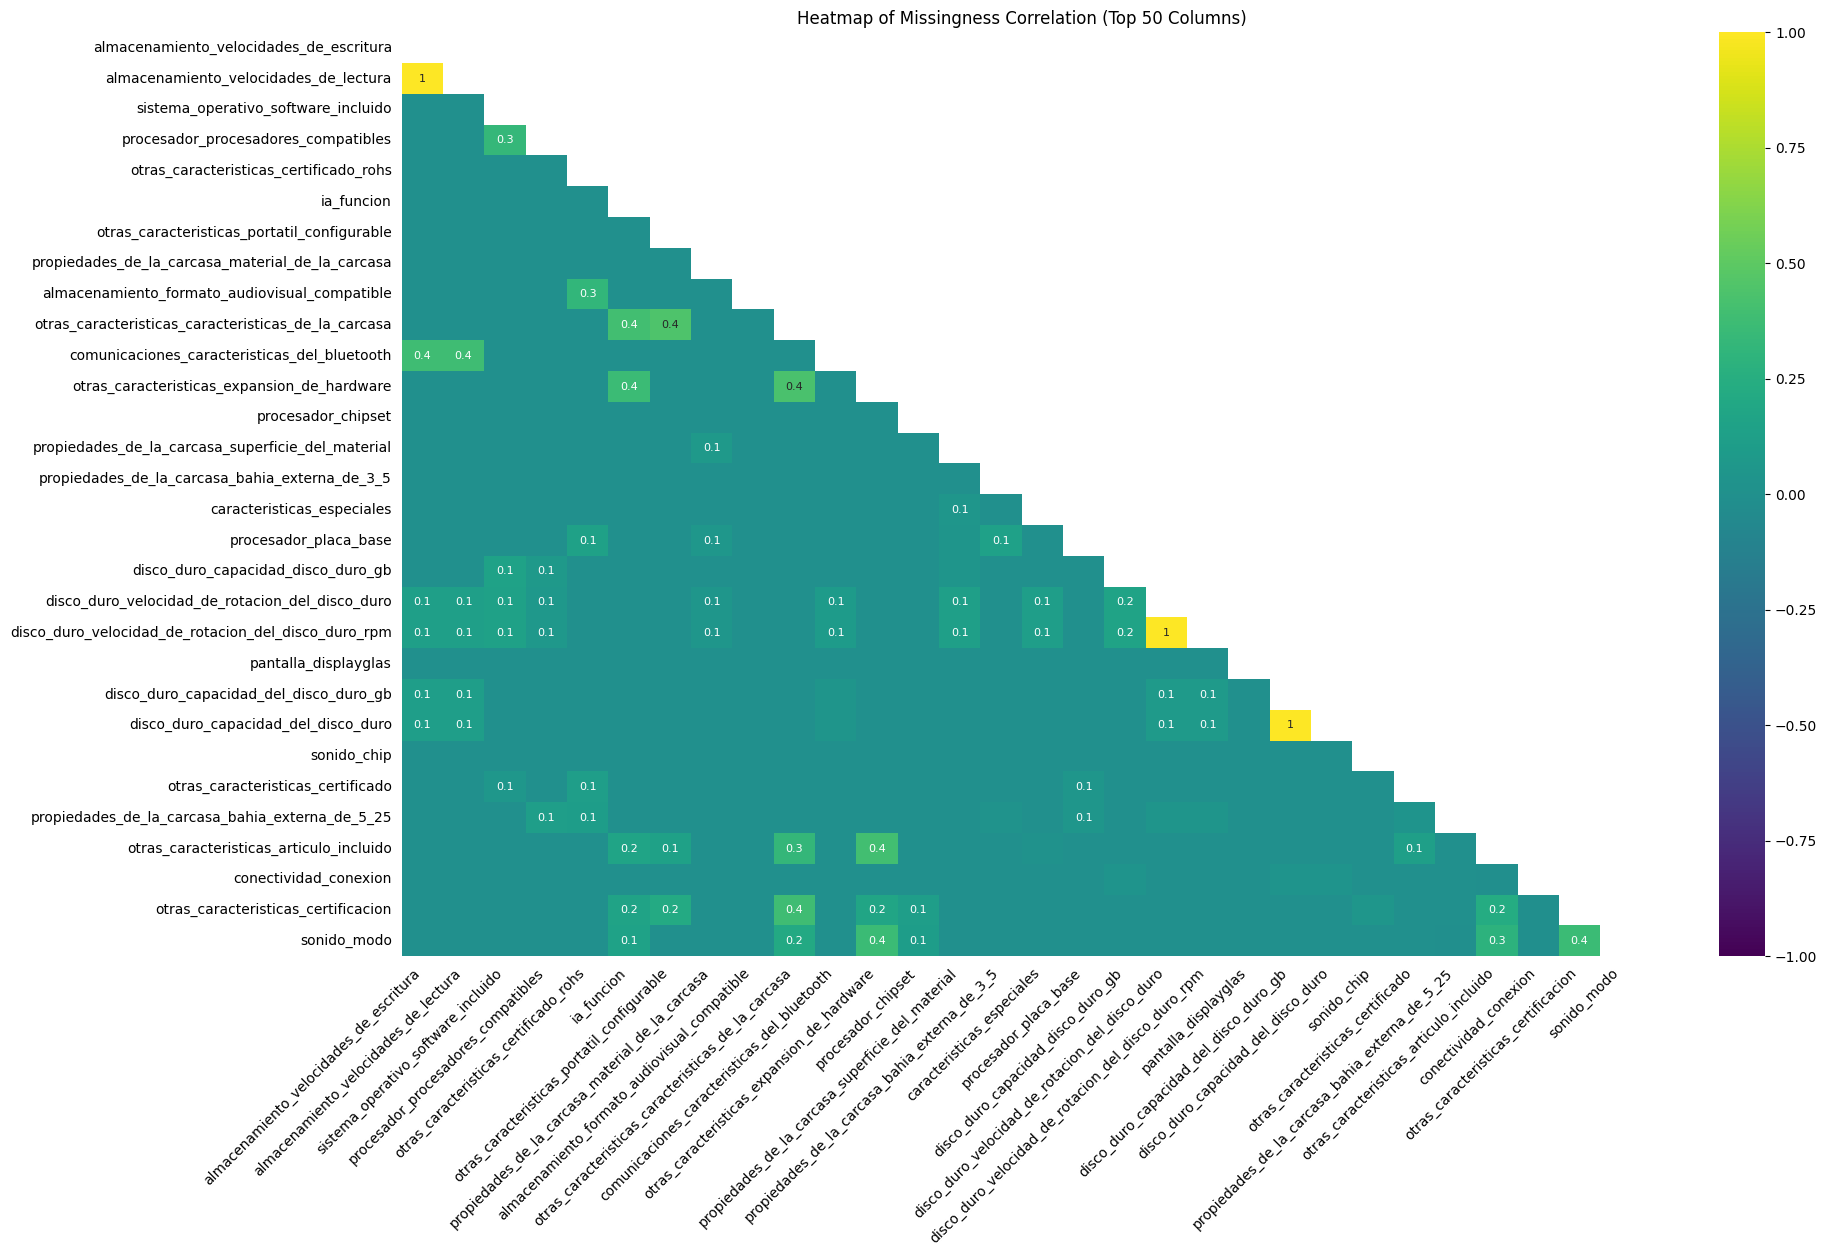

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

# Compute missing-value fraction and pick top 30
miss_frac = df.isnull().mean().sort_values(ascending=False)
top50 = miss_frac.head(30).index.tolist()

# Heatmap of just those top 300
plt.figure(figsize=(12, 8))
msno.heatmap(
    df[top50],
    cmap='viridis',
    fontsize=10      # shrink the font for readability
)
plt.title("Heatmap of Missingness Correlation (Top 50 Columns)")
plt.show()

Rule of thumb 
- most of the correlations are almost zero, suggestung that chance of being missing is independent of every other column’s missingness → consistent with MCAR
- correlation with 0.2-0.5 values we can say that we possibly have MAR variables 
-we have high co--missingness with correlation of 1 between:
we are conducting MCAR tests and checking for MAR in the next step

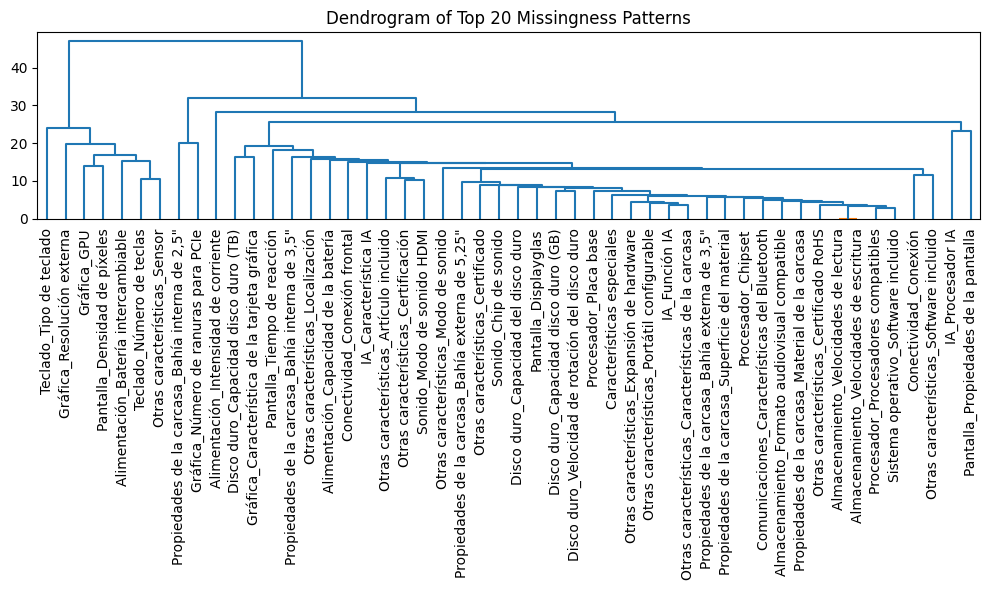

In [28]:
# Dendrogram clustering of missingness patterns 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

# 1) Compute missing‐value fraction per column
miss_frac = df.isnull().mean().sort_values(ascending=False)

# 2) Select top N columns 
top_cols = miss_frac.head(50).index
null_matrix = df[top_cols].isnull().T.astype(int)

# 3) Compute linkage
distances = pdist(null_matrix, metric='euclidean')
Z = linkage(distances, method='ward')

# 4) Plot dendrogram of only those top columns
plt.figure(figsize=(10, 6))
dendrogram(
    Z,
    labels=top_cols.tolist(),
    leaf_rotation=90,     # rotate labels to vertical
    leaf_font_size=10,    # smaller font
    color_threshold=1.0   # draws clusters in different colors
)
plt.title("Dendrogram of Top 20 Missingness Patterns")
plt.tight_layout()
plt.show()


This plot is a dendrogram of the 20 features that have the most missing values. It’s clustering the missingness vectors of each feature: for every pair of features, we look at which rows are missing in A vs. B, compute a distance (Euclidean) between those two binary “is-missing” patterns, and then do hierarchical clustering.
A small height at which two leaves merge means those two features are frequently missing in exactly the same rows.
A large height means their missingness patterns hardly overlap.
results suggest:
- misisng values will be treated as groups based on the product type. pantalla_.. , alimentancion_bateria_intercambiable, disco_duro_... and more are not random blanks, they reflect that theyre just not aplicable for a certain types of products
- some variables are very high up: pantalla_propiedades, and procesador on the dendogram suggesting a unique missingness patterns, however theyre from the top 20 missing values. so they have to be inspected further to decide how to deal with them 

confirming is missigness is grouped based on product type 

In [24]:
# missing values more than 50% and checking the correlation with product type
for col in high_missing:
    print(f"\nMissingness in {col} by product_type:")
    print(df.groupby('Tipo de producto')[col].apply(lambda x: x.isnull().mean()).sort_values(ascending=False))



Missingness in Pantalla_Tamaño de la pantalla by product_type:
Tipo de producto
Barebone                1.000000
PC completo             1.000000
Thin Client             1.000000
PC gaming               1.000000
PC de oficina           1.000000
PC multimedia           1.000000
Mini PC                 1.000000
Kit ampliación PC       1.000000
Workstation             1.000000
Ultrabook               0.062500
Portátil convertible    0.007491
Portátil multimedia     0.000517
Netbook                 0.000000
Chromebook              0.000000
Portátil 3D             0.000000
Portátil gaming         0.000000
Portátil profesional    0.000000
Name: Pantalla_Tamaño de la pantalla, dtype: float64

Missingness in Pantalla_Diagonal de la pantalla by product_type:
Tipo de producto
Barebone                1.000000
PC completo             1.000000
Thin Client             1.000000
PC gaming               1.000000
PC de oficina           1.000000
PC multimedia           1.000000
Mini PC                 

In [32]:
for col in df.columns[df.isnull().mean() < 0.5]:
    missing_by_type = df.groupby('Tipo de producto')[col].apply(lambda x: x.isnull().mean())
    if missing_by_type.std() > 0.1:
        print(f"{col} likely MAR — varies by product_type")


Serie likely MAR — varies by product_type
Procesador_Procesador likely MAR — varies by product_type
Disco duro_Tipo de disco duro likely MAR — varies by product_type
Comunicaciones_Versión Bluetooth likely MAR — varies by product_type
Medidas y peso_Profundidad likely MAR — varies by product_type
Medidas y peso_Ancho likely MAR — varies by product_type
Medidas y peso_Peso likely MAR — varies by product_type
Otras características_Equipamiento likely MAR — varies by product_type
Procesador_Fabricante del procesador likely MAR — varies by product_type
Procesador_Tipo de procesador likely MAR — varies by product_type
Disco duro_Número de discos duros (instalados) likely MAR — varies by product_type
Gráfica_Memoria gráfica likely MAR — varies by product_type
Sistema operativo_Sistema operativo likely MAR — varies by product_type
Procesador_Nombre en clave del procesador likely MAR — varies by product_type
Procesador_Caché likely MAR — varies by product_type
RAM_Memoria RAM likely MAR — vari

If std > 0.1, it means:
➤ Some product types have much more missing than others
➤ Therefore, missingness is not random
➤ It's likely MAR (Missing At Random) — depends on observed variable

Inspecting pantalla_propiedades and procesador missing trends for pantalla_propiedades and procesador

In [35]:
#MCAR features
likely_mcar = []

for col in df.columns:
    if df[col].isnull().sum() > 0:
        # Missingness flag
        df[f'{col}_missing'] = df[col].isnull().astype(int)

        # Check missingness correlation with every other categorical feature
        related_to_other_features = False

        for other_col in df.select_dtypes(include=['object', 'category']).columns:
            if other_col == col or df[other_col].nunique() < 2:
                continue

            # Compare missing vs non-missing distributions using group mean
            try:
                group_means = df.groupby(other_col)[f'{col}_missing'].mean()
                std_dev = group_means.std()

                if std_dev > 0.1:
                    related_to_other_features = True
                    break
            except:
                continue

        if not related_to_other_features:
            likely_mcar.append(col)
        print(f"Likely MCAR features ({len(likely_mcar)}):\n", likely_mcar)



Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCA

/var/folders/ct/j6s2hnjs0y1101ht51rf6f9w0000gn/T/ipykernel_61647/1176307730.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_missing'] = df[col].isnull().astype(int)
/var/folders/ct/j6s2hnjs0y1101ht51rf6f9w0000gn/T/ipykernel_61647/1176307730.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_missing'] = df[col].isnull().astype(int)
/var/folders/ct/j6s2hnjs0y1101ht51rf6f9w0000gn/T/ipykernel_61647/1176307730.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []


/var/folders/ct/j6s2hnjs0y1101ht51rf6f9w0000gn/T/ipykernel_61647/1176307730.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_missing'] = df[col].isnull().astype(int)
/var/folders/ct/j6s2hnjs0y1101ht51rf6f9w0000gn/T/ipykernel_61647/1176307730.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_missing'] = df[col].isnull().astype(int)
/var/folders/ct/j6s2hnjs0y1101ht51rf6f9w0000gn/T/ipykernel_61647/1176307730.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []


/var/folders/ct/j6s2hnjs0y1101ht51rf6f9w0000gn/T/ipykernel_61647/1176307730.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_missing'] = df[col].isnull().astype(int)
/var/folders/ct/j6s2hnjs0y1101ht51rf6f9w0000gn/T/ipykernel_61647/1176307730.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_missing'] = df[col].isnull().astype(int)
/var/folders/ct/j6s2hnjs0y1101ht51rf6f9w0000gn/T/ipykernel_61647/1176307730.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []


/var/folders/ct/j6s2hnjs0y1101ht51rf6f9w0000gn/T/ipykernel_61647/1176307730.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_missing'] = df[col].isnull().astype(int)
/var/folders/ct/j6s2hnjs0y1101ht51rf6f9w0000gn/T/ipykernel_61647/1176307730.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_missing'] = df[col].isnull().astype(int)
/var/folders/ct/j6s2hnjs0y1101ht51rf6f9w0000gn/T/ipykernel_61647/1176307730.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []
Likely MCAR features (0):
 []


/var/folders/ct/j6s2hnjs0y1101ht51rf6f9w0000gn/T/ipykernel_61647/1176307730.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_missing'] = df[col].isnull().astype(int)
/var/folders/ct/j6s2hnjs0y1101ht51rf6f9w0000gn/T/ipykernel_61647/1176307730.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_missing'] = df[col].isnull().astype(int)
/var/folders/ct/j6s2hnjs0y1101ht51rf6f9w0000gn/T/ipykernel_61647/1176307730.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Likely MCAR features (0):
 []


In [85]:
#procesador
# Calculate the percentage of missing 
print(f"Percentage of missing values in 'procesador': {missing_pct_procesador}%")
#inspecting missing trends
df['procesador'].value_counts(dropna=False).head(10)


Percentage of missing values in 'procesador': 13.802083333333334%


procesador
NaN                        1113
Intel Core Ultra 7 155H     192
Intel Core i5-1235U         165
Intel Core i5-1335U         141
Intel Core i7-1355U         134
Intel Core i5-10400         133
Intel Core i7-11700F        120
AMD Ryzen 5 4500            120
Intel Core i7-13700         105
Intel Core i7-13700F        105
Name: count, dtype: int64

In [38]:
df['procesador_missing'] = df['procesador'].isnull().astype(int)

# Example: does missingness vary by 'product_type'?
missing_by_type = df.groupby('Tipo de producto')['procesador_missing'].mean()
print(missing_by_type.sort_values(ascending=False))


KeyError: 'procesador_procesador_'

In [84]:
#pantalla_propiedades
# Calculate the percentage of missing 
print(f"Percentage of missing values in 'pantalla_propiedades': {missing_pct_pantalla_propiedades}%")

df['pantalla_propiedades'].value_counts(dropna=False).head(10)

Percentage of missing values in 'pantalla_propiedades': 95.99454365079364%


pantalla_propiedades
NaN                                                  7741
convertible                                           212
multitáctil de 10 puntos                               27
capacitiva                                             21
convertible, capacitiva                                16
capacitiva, multitáctil de 10 puntos                   14
convertible, capacitiva, multitáctil de 10 puntos       8
multitáctil de 10 puntos, antiarañazos                  4
ajustable en altura                                     3
convertible, multitáctil de 10 puntos                   3
Name: count, dtype: int64

In [76]:
pd.set_option('display.max_columns', None)    # show all columns
pd.set_option('display.width', 1000)          # expand the display width
print(df.head())                              # now you'll see all columns


                             titulo  ofertas     tipo_de_producto              serie  pantalla_tamano_pulgadas  pantalla_diagonal_cm pantalla_tecnologia  pantalla_luminosidad_cd_m2            procesador disco_duro_tipo grafica_salida_de_video grafica_resolucion_externa conectividad_lector_de_tarjetas comunicaciones_conectividad comunicaciones_version_bluetooth   camara_webcam     camara_funcion    camara_resolucion         teclado_tipo  teclado_numero_de_teclas              teclado_teclas_adicionales  sonido_numero_de_altavoces alimentacion_bateria alimentacion_autonomia_de_la_bateria  alimentacion_vatios_hora alimentacion alimentacion_bateria_intercambiable medidas_y_peso_material_de_la_carcasa medidas_y_peso_diseno medidas_y_peso_profundidad medidas_y_peso_altura medidas_y_peso_ancho medidas_y_peso_peso                 otras_caracteristicas_equipamiento          otras_caracteristicas_seguridad_integrada otras_caracteristicas_sensor  otras_caracteristicas_fecha_de_lanzamiento  \
0    

## Dataset Splitting

In [117]:
df['tipo_de_producto'].unique()

array(['Portátil multimedia', 'Portátil gaming', 'Portátil profesional',
       nan, 'Ultrabook', 'Portátil convertible', 'Netbook', 'Portátil 3D',
       'Chromebook', 'Mini PC', 'PC multimedia', 'PC gaming',
       'PC de oficina', 'Workstation', 'Barebone', 'PC completo',
       'Thin Client', 'Kit ampliación PC'], dtype=object)

Because different "Tipo de producto" has extremely different properties, it will be beneficial to split the dataset into different csv files. This will help us will object and schema managemnet when storing and querying for items in the database.

### Split by 'Tipo De Producto'

In [118]:
unique_product_types = df['tipo_de_producto'].unique()
dfs_by_product_type = {}

for product_type in unique_product_types:
    if pd.isna(product_type): 
        subset_df = df[df['tipo_de_producto'].isna()].copy() 
        subset_df.dropna(axis=1, how='all', inplace=True) # Clean it too
        dfs_by_product_type['Desconocido'] = subset_df 
        print(f"Processed 'Desconocido': original columns {df[df['tipo_de_producto'].isna()].shape[1]}, cleaned columns {subset_df.shape[1]}")
    else:
        subset_df = df[df['tipo_de_producto'] == product_type].copy()
        original_cols = subset_df.shape[1]
        # Drop columns where ALL values are NaN
        subset_df.dropna(axis=1, how='all', inplace=True) 
        cleaned_cols = subset_df.shape[1]
        dfs_by_product_type[product_type] = subset_df
        print(f"Processed '{product_type}': original columns {original_cols}, cleaned columns {cleaned_cols}")


Processed 'Portátil multimedia': original columns 164, cleaned columns 129
Processed 'Portátil gaming': original columns 164, cleaned columns 120
Processed 'Portátil profesional': original columns 164, cleaned columns 120
Processed 'Desconocido': original columns 164, cleaned columns 150
Processed 'Ultrabook': original columns 164, cleaned columns 102
Processed 'Portátil convertible': original columns 164, cleaned columns 112
Processed 'Netbook': original columns 164, cleaned columns 88
Processed 'Portátil 3D': original columns 164, cleaned columns 71
Processed 'Chromebook': original columns 164, cleaned columns 98
Processed 'Mini PC': original columns 164, cleaned columns 83
Processed 'PC multimedia': original columns 164, cleaned columns 74
Processed 'PC gaming': original columns 164, cleaned columns 79
Processed 'PC de oficina': original columns 164, cleaned columns 83
Processed 'Workstation': original columns 164, cleaned columns 80
Processed 'Barebone': original columns 164, clean

In [119]:
import os

output_data_path = '../data/split_by_type/' 
if not os.path.exists(output_data_path):
    os.makedirs(output_data_path)

# The dfs_by_product_type dictionary now holds the cleaned DataFrames
for product_type, df_cleaned_subset in dfs_by_product_type.items():
    filename_safe_product_type = "".join(c if c.isalnum() else "_" for c in str(product_type))
    file_path = os.path.join(output_data_path, f"{filename_safe_product_type}.csv")
    df_cleaned_subset.to_csv(file_path, index=False)
    print(f"Saved cleaned data to: {file_path}")


Saved cleaned data to: ../data/split_by_type/Portátil_multimedia.csv
Saved cleaned data to: ../data/split_by_type/Portátil_gaming.csv
Saved cleaned data to: ../data/split_by_type/Portátil_profesional.csv
Saved cleaned data to: ../data/split_by_type/Desconocido.csv
Saved cleaned data to: ../data/split_by_type/Ultrabook.csv
Saved cleaned data to: ../data/split_by_type/Portátil_convertible.csv
Saved cleaned data to: ../data/split_by_type/Netbook.csv
Saved cleaned data to: ../data/split_by_type/Portátil_3D.csv
Saved cleaned data to: ../data/split_by_type/Chromebook.csv
Saved cleaned data to: ../data/split_by_type/Mini_PC.csv
Saved cleaned data to: ../data/split_by_type/PC_multimedia.csv
Saved cleaned data to: ../data/split_by_type/PC_gaming.csv
Saved cleaned data to: ../data/split_by_type/PC_de_oficina.csv
Saved cleaned data to: ../data/split_by_type/Workstation.csv
Saved cleaned data to: ../data/split_by_type/Barebone.csv
Saved cleaned data to: ../data/split_by_type/PC_completo.csv
Saved 

### Split by Category

In [120]:
# Example mapping:
category_map = {
    'Portátil multimedia': 'Laptop', 'Portátil gaming': 'Laptop', 
    'Portátil profesional': 'Laptop', 'Ultrabook': 'Laptop',
    'Portátil convertible': 'Laptop', 'Netbook': 'Laptop',
    'Portátil 3D': 'Laptop', 'Chromebook': 'Laptop',

    'Mini PC': 'Desktop_PC', 'PC multimedia': 'Desktop_PC', 
    'PC gaming': 'Desktop_PC', 'PC de oficina': 'Desktop_PC',
    'Workstation': 'Desktop_PC', 'Barebone': 'Desktop_PC', 
    'PC completo': 'Desktop_PC',

    'Kit ampliación PC': 'Component_Kit',
    'Thin Client': 'Specialized_PC', 
}

In [74]:
df['Categoria_General'] = df['tipo_de_producto'].map(category_map)
# Handle any types not in your map, perhaps by assigning them to 'Other'
df['Categoria_General'].fillna('Otro', inplace=True) 

NameError: name 'category_map' is not defined

In [123]:
dfs_by_general_category = {}
for general_category_name in df['Categoria_General'].unique():
    subset_df = df[df['Categoria_General'] == general_category_name].copy()
    # IMPORTANT: Drop all-NaN columns again for these new broader DFs
    subset_df.dropna(axis=1, how='all', inplace=True)
    dfs_by_general_category[general_category_name] = subset_df
    
    # Save these new broader category DataFrames to new CSVs
    # (You'll want a new output folder or different filenames)
    output_path_general = '../data/split_by_general_category/'
    if not os.path.exists(output_path_general):
        os.makedirs(output_path_general)
    
    filename_safe_general_category = "".join(c if c.isalnum() else "_" for c in str(general_category_name))
    file_path = os.path.join(output_path_general, f"{filename_safe_general_category}.csv")
    subset_df.to_csv(file_path, index=False)
    print(f"Saved cleaned data to: {file_path} (Rows: {len(subset_df)}, Columns: {subset_df.shape[1]})")

Saved cleaned data to: ../data/split_by_general_category/Laptop.csv (Rows: 3889, Columns: 132)
Saved cleaned data to: ../data/split_by_general_category/Otro.csv (Rows: 545, Columns: 151)
Saved cleaned data to: ../data/split_by_general_category/Desktop_PC.csv (Rows: 3602, Columns: 86)
Saved cleaned data to: ../data/split_by_general_category/Specialized_PC.csv (Rows: 25, Columns: 62)
Saved cleaned data to: ../data/split_by_general_category/Component_Kit.csv (Rows: 3, Columns: 35)


## Visualization

## Transformation

## Validation & Consistency Checks